# 梯度下降
梯度下降法的定義是：

$w^{j+1}=w^j-\alpha\nabla E(w)，j 為迭代次數，\alpha 為學習率。$

其中 $\nabla$ 就是梯度，一次微分的意思。<br>
若是單純的 $y=ax+b$ 的情況，一次微分就是斜率。<br>
只是在多變量的情境中，斜率這個名稱太狹隘，於是在數學上就稱為「梯度」。<br>

梯度的算法就是對每個變量作一次偏微分。
例如，給一函數為：$f(x,y)=x^2+2xy+y^2$。<br>
                                 
計算其梯度為：$\mathrm{\nabla}\ f\left(x_1,x_2\right)=\left(\frac{\partial f\left(x_1,x_2\right)}{\partial x_1},\ \frac{\partial f\left(x_1,x_2\right)}{\partial x_2}\right)=\left(2x_1+1,\ 2x_2+1\right)$ <br>

當 $(x_1, x_2)=(1, 2)$ 時，$\mathrm{\nabla}\ f\left(1,\ 2\right)=\left(3,\ 5\right)$。
上述結果用白話文來說，即 $x_1$ 方向上的斜率為 $3$；$x_2$ 方向上的斜率為 $5$ 的意思。

回過頭來看剛剛給的函數：$E(w)=w^2$，
我們這就來「手動」跑一次梯度下降法。

假定，第一次隨機初始化點位，$w=5$。
![](GD.png)
在初始化點位 (5, 25) 上，經計算後的切線斜率，也就是梯度，為 +10，這會影響幾件事情：

### 1. 方向：將梯度的方向取負號，就是我們想要移動的方向。
### 2. 大小：由於學習率固定，因此梯度值愈大，每次移動的距離愈遠！

![](GD_2.png)

![](GD_3.png)

### 這個反覆迭代的過程會一直到終止條件出現為止，例如：
#### 1. 迭代次數達到某個值。
#### 2. 迭代後的 loss 值間的差異小於某個數。
#### 3. 程式執行總時間限制。

[-5.         -4.         -3.2        -2.56       -2.048      -1.6384
 -1.31072    -1.048576   -0.8388608  -0.67108864 -0.53687091 -0.42949673
 -0.34359738 -0.27487791 -0.21990233 -0.17592186]


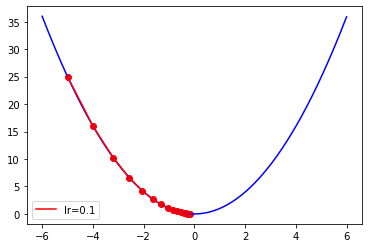

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.1   
# 梯度下降法 
x = GD(x_start, dfunc, epochs, lr=lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()